
Baseline Perceptron -> lr=0.1, epochs=50
Train accuracy: 1.0
Test  accuracy: 1.0


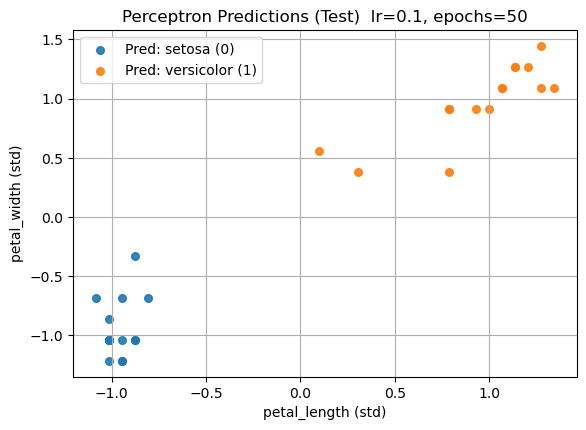


=== Experiment: learning rate & epochs ===
    lr   | epochs | train_acc | test_acc
  0.01  | 10     |     1.000 |    1.000
  0.01  | 50     |     1.000 |    1.000
  0.01  | 200    |     1.000 |    1.000
  0.1   | 10     |     1.000 |    1.000
  0.1   | 50     |     1.000 |    1.000
  0.1   | 200    |     1.000 |    1.000


In [1]:
# =========================================================
# Assignment: 1.5 Perceptrons
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

plt.rcParams["figure.figsize"] = (6.5, 4.5)

# ---- Absolute path ----
FILE_PATH = r"C:\Users\MasterDanteDev86\Downloads\CAP350-O Deep Learning - Online\W1\DPL\data\iris.csv"

# -----------------------------
# Load data and pick columns
# -----------------------------
df = pd.read_csv(FILE_PATH)

feat_x = "petal_length"
feat_y = "petal_width"
label_col = "iris_type"

# Two classes (drop Virginica rows)
df2 = df[~df[label_col].str.contains("virginica", case=False, na=False)].copy()

# Map class names to 0/1
name_to_int = {"Iris-setosa": 0, "Iris-versicolor": 1}
df2 = df2[df2[label_col].isin(name_to_int.keys())].copy()
df2["target"] = df2[label_col].map(name_to_int)

X = df2[[feat_x, feat_y]].values.astype(float)
y = df2["target"].values.astype(int)

# Simple standardization
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1.0
X = (X - X_mean) / X_std

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

# =========================================================
# Tiny Perceptron class
# =========================================================
class Perceptron:
    def __init__(self, lr=0.1, epochs=50, random_state=0):
        self.lr = float(lr)
        self.epochs = int(epochs)
        self.random_state = int(random_state)
        self.w = None
        self.b = 0.0

    def fit(self, X, y):
        # Convert labels {0,1} -> {-1,+1} for updates
        y_pm = np.where(y == 1, 1, -1)
        n, d = X.shape
        rng = np.random.RandomState(self.random_state)
        self.w = np.zeros(d, dtype=float)
        self.b = 0.0

        for _ in range(self.epochs):
            idx = rng.permutation(n)   # shuffle each epoch (simple)
            for i in idx:
                xi = X[i]
                yi = y_pm[i]
                raw = np.dot(self.w, xi) + self.b
                y_hat = 1 if raw >= 0 else -1
                if y_hat != yi:
                    # basic perceptron update
                    self.w = self.w + self.lr * yi * xi
                    self.b = self.b + self.lr * yi
        return self

    def predict(self, X):
        raw = np.dot(X, self.w) + self.b
        return (raw >= 0).astype(int)  # back to {0,1}

# -----------------------------
# Train a baseline model
# -----------------------------
baseline_lr = 0.1
baseline_epochs = 50

clf = Perceptron(lr=baseline_lr, epochs=baseline_epochs, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test  = clf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test  = accuracy_score(y_test,  y_pred_test)

print(f"\nBaseline Perceptron -> lr={baseline_lr}, epochs={baseline_epochs}")
print("Train accuracy:", round(acc_train, 3))
print("Test  accuracy:", round(acc_test, 3))

# -----------------------------
# Visualization
# -----------------------------
def plot_predictions(Xset, ypred, title):
    i0 = (ypred == 0)
    i1 = (ypred == 1)
    plt.scatter(Xset[i0, 0], Xset[i0, 1], s=30, alpha=0.9, label="Pred: setosa (0)")
    plt.scatter(Xset[i1, 0], Xset[i1, 1], s=30, alpha=0.9, label="Pred: versicolor (1)")
    plt.xlabel(f"{feat_x} (std)")
    plt.ylabel(f"{feat_y} (std)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(
    X_test, y_pred_test,
    title=f"Perceptron Predictions (Test)  lr={baseline_lr}, epochs={baseline_epochs}"
)

# -----------------------------
# Experiment: learning rate and epochs
# -----------------------------
candidates_lr = [0.01, 0.1]
candidates_epochs = [10, 50, 200]

print("\n=== Experiment: learning rate & epochs ===")
print("    lr   | epochs | train_acc | test_acc")
results = []
for lr in candidates_lr:
    for ep in candidates_epochs:
        m = Perceptron(lr=lr, epochs=ep, random_state=1)
        m.fit(X_train, y_train)
        tr = accuracy_score(y_train, m.predict(X_train))
        te = accuracy_score(y_test,  m.predict(X_test))
        results.append((lr, ep, tr, te))
        print(f"  {lr:<5} | {ep:<6} | {tr:>9.3f} | {te:>8.3f}")

# =========================================================
# Reflections
# =========================================================
# • Changing lr/epochs:
#   More epochs usually helped the model finish separating things.
#   Tiny lr (0.01) needed more epochs to get good results.
#   A bigger lr worked, but sometimes felt a little jumpy.
#
# • 0 errors on training set = perfect model?
#   Not necessarily. It just memorized the train points.
#   Test accuracy is the real check for how it generalizes.
#
# • Risks of too many epochs or a big learning rate?
#   Too many epochs can start to overfit a bit.
#   Too large lr can bounce around the boundary and not settle nicely.
#
# • If the data isn’t linearly separable:
#   A single perceptron can’t bend the line. It won’t hit 100% and a few points
#   will keep flipping. Accuracy plateaus and stops improving.
#
# NOTE: Absolute path is for my machine. If someone else runs this,
# put iris.csv next to the file and change FILE_PATH to "iris.csv".
